# ¿Control de lazo cerrado o control adaptativo?
## Ejemplo 1: Incertezas a baja frecuencia

En este ejemplo se muestra cómo el control de lazo cerrado consigue actuar sobre un sistema del que tenemos una incertidumbre muy grande en uno de sus parámetros: ¡se observa que en uno de los extremos es inestable!

$$ G=\frac{1}{(s+1)(s+a)}$$

con $$a\in \{-0.01, 0, 0.01 \}$$

El enfoque por adaptativo consistiría en identificar de forma on-line el parámetro $a$, para modificar la ley de control. 

Pero se muestra que alcanza con proponer un control proporcional de ganancia unitaria, ya que la planta tiene una alta ganancia en DC y la sensibilidad resulta muy baja en bajas frecuencias. Además en altas frecuencias no hay limitaciones porque el comportamiento de las tres plantas es muy parecido

$$ S=\frac{1}{1+C\,G} $$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctrl


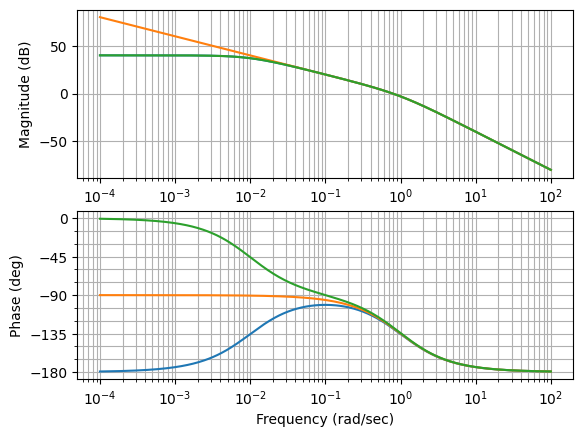

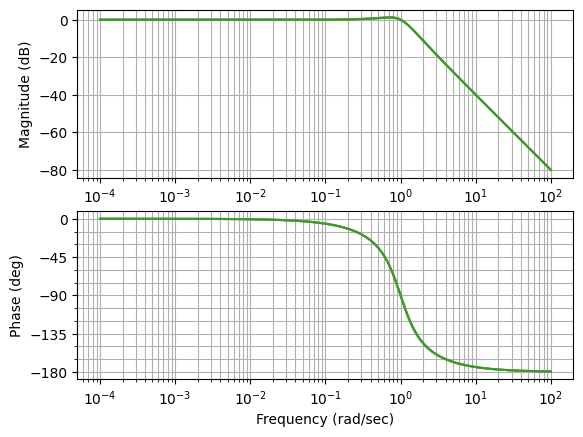

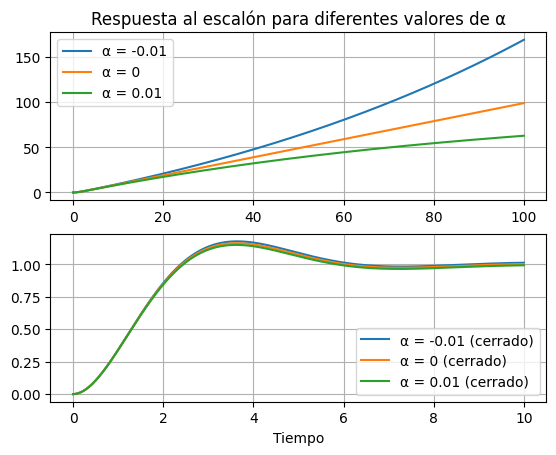

In [3]:
s = ctrl.TransferFunction.s

w = np.logspace(-4,2,500)
for alpha in [-0.01, 0, 0.01]:
    G = 1 / ((s+1)*(s+alpha))
    G.name = "G_{alpha}"

    # Respuesta al escalón
    T, y = ctrl.step_response(G, T=np.linspace(0, 100, 1000))
    plt.figure(1)
    plt.subplot(2,1,1); plt.grid() 
    plt.plot(T, y, label=f'α = {alpha}')
    plt.legend()

    # Respuesta al escalón del sistema cerrado
    Gcl = ctrl.feedback(G,1)
    Gcl.name = f"Gcl_{alpha}"
    T, y = ctrl.step_response(Gcl,T=np.linspace(0, 10, 1000))
    plt.subplot(2,1,2); plt.grid()
    plt.plot(T, y, label=f'α = {alpha} (cerrado)')
    plt.legend()

    plt.figure(2)
    ctrl.bode(G, omega=w, dB=True, plot=True)

    plt.figure(3)
    ctrl.bode(Gcl,  omega=w, dB=True, plot=True)

plt.figure(1)
plt.xlabel('Tiempo')
#plt.ylabel('Respuesta')
plt.subplot(2,1,1);plt.title('Respuesta al escalón para diferentes valores de α')

plt.show()

## Ejemplo de incertezas a altas frecuencias

Se tiene la siguiente planta

$$ G = 400\frac{1-sT}{(s+1)(s+20)(1+sT)} $$

con $$T \in \{0, 0.015, 0.03 \}$$ 

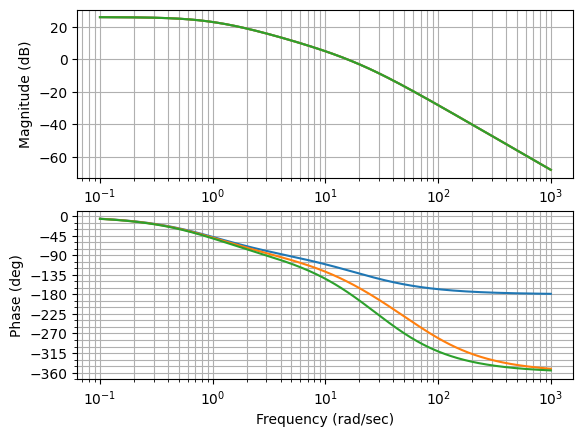

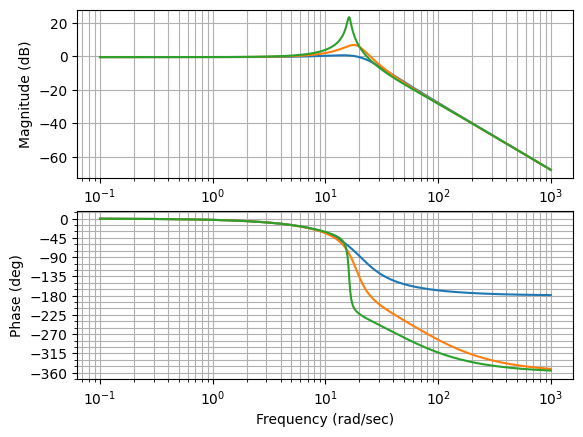

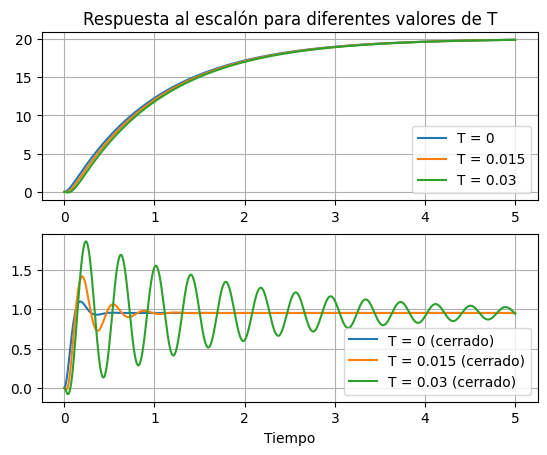

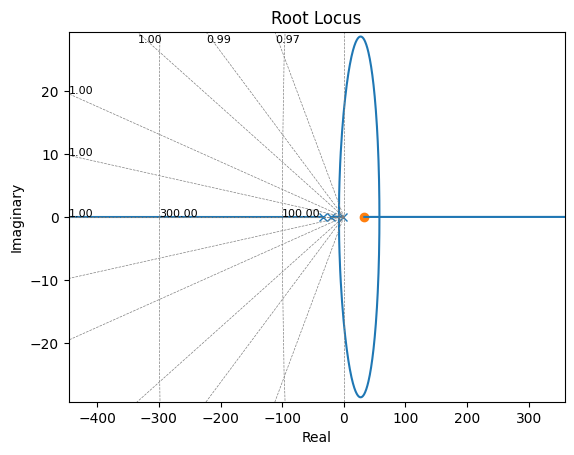

In [38]:
s = ctrl.TransferFunction.s
w = np.logspace(-1,3,500)

for T in [0, 0.015, 0.030]:
    G = 400*(1-s*T) / ((s+1)*(s+20)*(1+s*T))

    # Respuesta al escalón
    t, y = ctrl.step_response(G, T=np.linspace(0, 5, 1000))
    plt.figure(1)
    plt.subplot(2,1,1); plt.grid() 
    plt.plot(t, y, label=f'T = {T}')    
    plt.legend()

    # Respuesta al escalón del sistema cerrado
    # A modo de baseline
    C = 1
    # Una opción de controlador es subir la ganancia en baja y sumar fase en alta para dar más margen
    #C = 0.01*(s+1)*(s+20)/s
    # Otra opción es limitar el ancho de banda realimentando poco
    #C = 0.1
    Gcl = ctrl.feedback(C*G,1)
    t, y = ctrl.step_response(Gcl,T=np.linspace(0, 5, 1000))
    plt.subplot(2,1,2); plt.grid()
    plt.plot(t, y, label=f'T = {T} (cerrado)')
    plt.legend()

    plt.figure(2)
    mag, phase, omega = ctrl.bode(G, omega=w, dB=True, plot=True)

    plt.figure(3)
    ctrl.bode_plot(Gcl, omega=w, dB=True, plot=True)


plt.figure(1)
plt.xlabel('Tiempo')
plt.subplot(2,1,1);plt.title('Respuesta al escalón para diferentes valores de T')

plt.figure(4)
ctrl.rlocus(G*C,initial_gain=1, plot=True)

plt.show()

